<a href="https://colab.research.google.com/github/Venu786/Flight-price-prediction/blob/master/flightpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_excel(r'/content/flight_price_prediction.xlsx') 
df.head()



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [20]:
pd.set_option('display.max_columns', None)

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [22]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
47h 40m      1
29h 40m      1
29h 10m      1
5m           1
30h 25m      1
Name: Duration, Length: 368, dtype: int64

In [23]:
df.dropna(inplace = True)


In [24]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Explorative data analysis

In [26]:
df["Journey_day"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df["Journey_month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month



In [27]:
df.drop(["Date_of_Journey"], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [28]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [29]:


df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour


df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute


df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [32]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [33]:
df.drop(["Duration"], axis = 1, inplace = True)


In [34]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

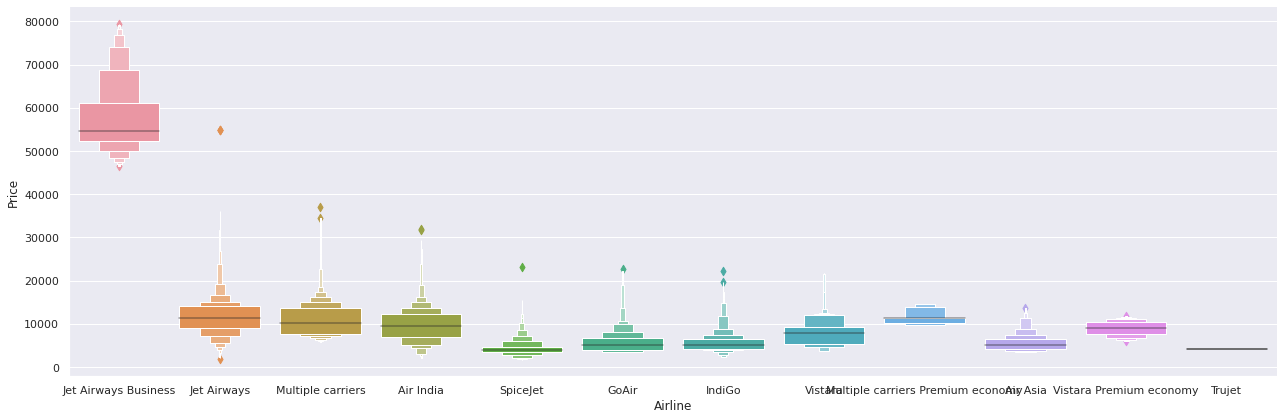

In [36]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [37]:

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
df["Source"].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

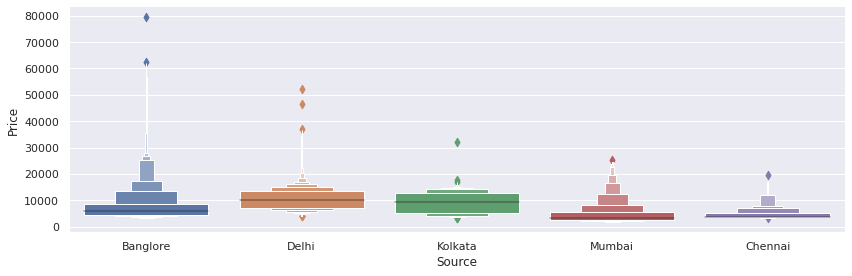

In [39]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [40]:

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [41]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [42]:

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [43]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [44]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [52]:
df["Total_Stops"].value_counts()
df["Total_Stops"].shape

(10682,)

In [53]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [54]:
df.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [55]:
df1= pd.concat([df, Airline, Source, Destination], axis = 1)


In [56]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [58]:
df1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
df1.shape

(10682, 30)

Testing dataset

In [60]:
test_data=pd.read_excel(r"/content/fpp_test.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [61]:

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
De

In [62]:
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [63]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [64]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [65]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [66]:
# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [67]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata  

In [68]:
data_test.head()

,Dep_Time,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,22:20,0,3897,24,3,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,05:50,2,7662,1,5,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,09:25,2,13882,9,6,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,18:05,1,6218,12,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,16:50,1,13302,1,3,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,
**heatmap**
**feature_importance_**
**SelectKBest**



In [69]:
df1.shape

(10682, 30)

In [70]:
df1.columns


Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [71]:
X = df1.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
y = df1.iloc[:, 1]
y.head()
y.shape

(10682,)

<function matplotlib.pyplot.show>

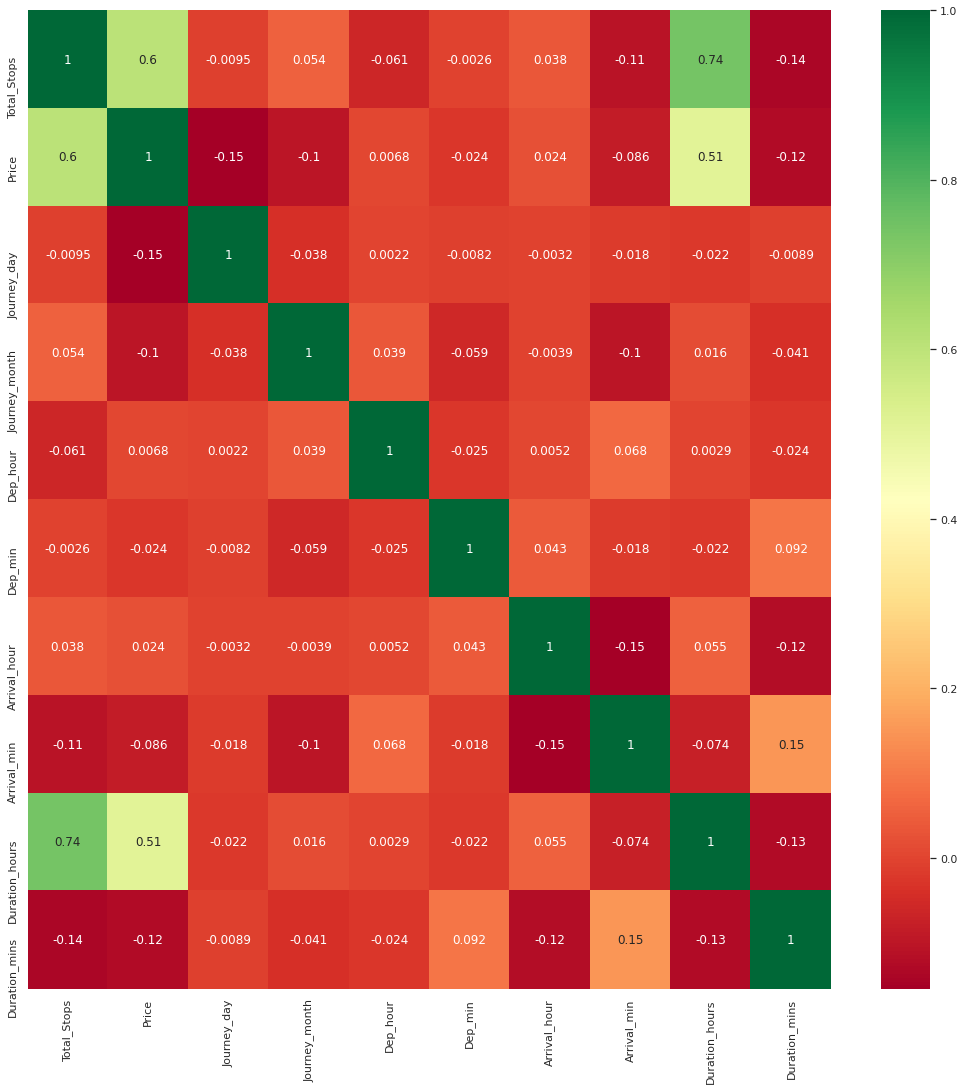

In [76]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [78]:
print(selection.feature_importances_)


[2.31766828e-01 1.44521248e-01 5.22202141e-02 2.45074487e-02
 2.10696759e-02 2.83622335e-02 1.97954399e-02 1.25404220e-01
 1.78674531e-02 1.01354168e-02 1.87017188e-03 1.66663561e-02
 1.39868262e-01 6.72334220e-02 1.87520990e-02 8.43457875e-04
 2.98707915e-03 1.01163378e-04 5.08093393e-03 7.34436953e-05
 4.13305945e-04 1.04256421e-02 3.39806627e-03 5.74577814e-03
 1.05049099e-02 8.48567069e-03 6.73471112e-03 5.08540939e-04
 2.46568087e-02]


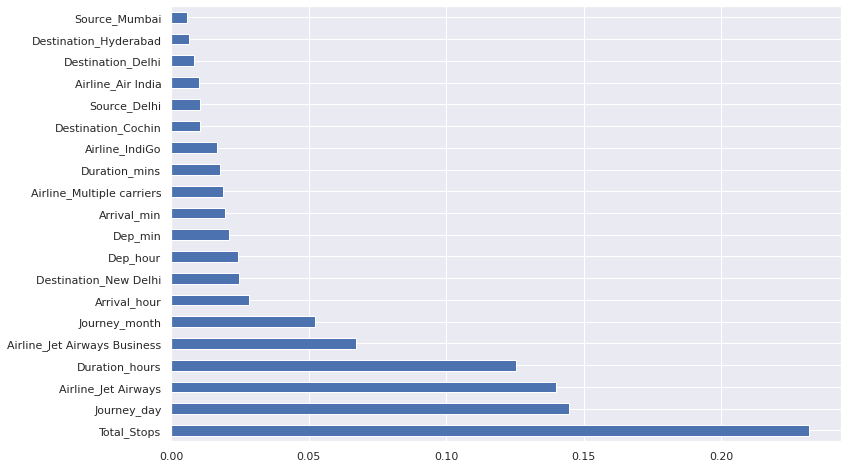

In [79]:

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test
If needed do scaling of data
Scaling is not done in Random forest
Import model
Fit the data
Predict w.r.t X_test
In regression check RSME Score
Plot graph

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
reg_rf = ExtraTreesRegressor()
reg_rf.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [83]:
y_pred = reg_rf.predict(X_test)

In [84]:
reg_rf.score(X_train, y_train)

0.9692481193220677

In [85]:
reg_rf.score(X_test, y_test)


0.803423460372002

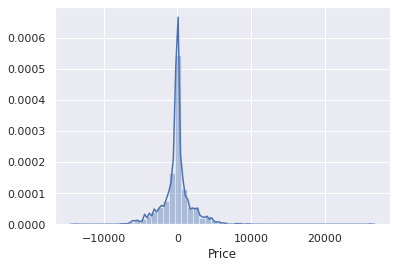

In [86]:

sns.distplot(y_test-y_pred)
plt.show()

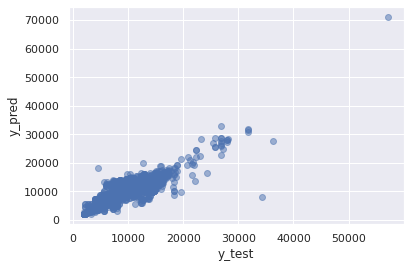

In [87]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
from sklearn import metrics

In [89]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1225.8802252378725
MSE: 4238594.419467712
RMSE: 2058.784694781781


In [90]:
2090.5509/(max(y)-min(y))

0.026887077025966846

In [91]:
metrics.r2_score(y_test, y_pred)

0.8034234603720021

**Hyperparameter Tuning**
Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast
GridSearchCV
Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [94]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [95]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [96]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False...
                   iid=

In [97]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [98]:
prediction = rf_random.predict(X_test)

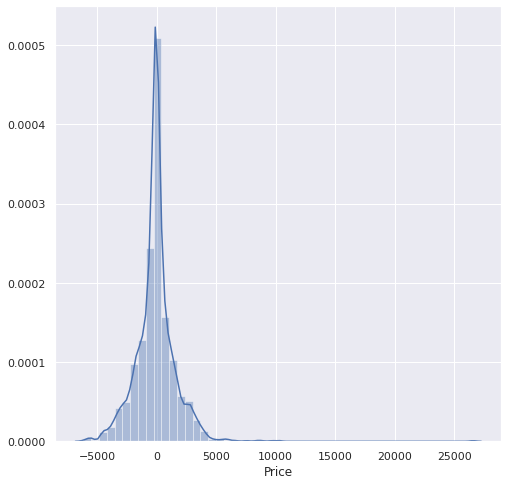

In [99]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

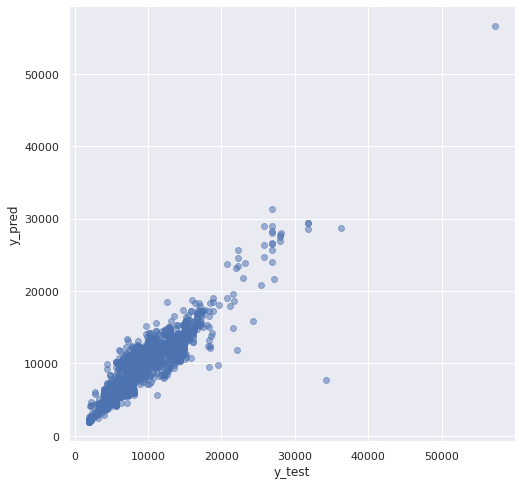

In [100]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1099.3021498066162
MSE: 2927222.473615523
RMSE: 1710.9127603754443



**Save the model to reuse it again**

In [106]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [108]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [109]:

y_prediction = forest.predict(X_test)

In [110]:

metrics.r2_score(y_test, y_prediction)

0.8034234603720021

In [112]:
!pip install flask-ngrok

In [115]:
 pip install -U flask-cors

In [121]:
 pip install waitress

In [124]:
export FLASK_ENV=development
flask run

SyntaxError: ignored

In [122]:
from flask import Flask, request, render_template
from flask_cors import cross_origin
import sklearn
import pickle
import pandas as pd

app = Flask(__name__)
model = pickle.load(open("flight_rf.pkl", "rb"))



@app.route("/")
@cross_origin()
def home():
    return render_template("home.html")




@app.route("/predict", methods = ["GET", "POST"])
@cross_origin()
def predict():
    if request.method == "POST":

        # Date_of_Journey
        date_dep = request.form["Dep_Time"]
        Journey_day = int(pd.to_datetime(date_dep, format="%Y-%m-%dT%H:%M").day)
        Journey_month = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").month)
        # print("Journey Date : ",Journey_day, Journey_month)

        # Departure
        Dep_hour = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").hour)
        Dep_min = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").minute)
        # print("Departure : ",Dep_hour, Dep_min)

        # Arrival
        date_arr = request.form["Arrival_Time"]
        Arrival_hour = int(pd.to_datetime(date_arr, format ="%Y-%m-%dT%H:%M").hour)
        Arrival_min = int(pd.to_datetime(date_arr, format ="%Y-%m-%dT%H:%M").minute)
        # print("Arrival : ", Arrival_hour, Arrival_min)

        # Duration
        dur_hour = abs(Arrival_hour - Dep_hour)
        dur_min = abs(Arrival_min - Dep_min)
        # print("Duration : ", dur_hour, dur_min)

        # Total Stops
        Total_stops = int(request.form["stops"])
        # print(Total_stops)

        # Airline
        # AIR ASIA = 0 (not in column)
        airline=request.form['airline']
        if(airline=='Jet Airways'):
            Jet_Airways = 1
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

        elif (airline=='IndiGo'):
            Jet_Airways = 0
            IndiGo = 1
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

        elif (airline=='Air India'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 1
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='Multiple carriers'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 1
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='SpiceJet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 1
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='Vistara'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 1
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='GoAir'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 1
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Multiple carriers Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 1
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Jet Airways Business'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 1
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Vistara Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 1
            Trujet = 0
            
        elif (airline=='Trujet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 1

        else:
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        # print(Jet_Airways,
        #     IndiGo,
        #     Air_India,
        #     Multiple_carriers,
        #     SpiceJet,
        #     Vistara,
        #     GoAir,
        #     Multiple_carriers_Premium_economy,
        #     Jet_Airways_Business,
        #     Vistara_Premium_economy,
        #     Trujet)

        # Source
        # Banglore = 0 (not in column)
        Source = request.form["Source"]
        if (Source == 'Delhi'):
            s_Delhi = 1
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

        elif (Source == 'Kolkata'):
            s_Delhi = 0
            s_Kolkata = 1
            s_Mumbai = 0
            s_Chennai = 0

        elif (Source == 'Mumbai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 1
            s_Chennai = 0

        elif (Source == 'Chennai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 1

        else:
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

        # print(s_Delhi,
        #     s_Kolkata,
        #     s_Mumbai,
        #     s_Chennai)

        # Destination
        # Banglore = 0 (not in column)
        Source = request.form["Destination"]
        if (Source == 'Cochin'):
            d_Cochin = 1
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0
        
        elif (Source == 'Delhi'):
            d_Cochin = 0
            d_Delhi = 1
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0

        elif (Source == 'New_Delhi'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 1
            d_Hyderabad = 0
            d_Kolkata = 0

        elif (Source == 'Hyderabad'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 1
            d_Kolkata = 0

        elif (Source == 'Kolkata'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 1

        else:
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0

        # print(
        #     d_Cochin,
        #     d_Delhi,
        #     d_New_Delhi,
        #     d_Hyderabad,
        #     d_Kolkata
        # )
        

    #     ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
    #    'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
    #    'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
    #    'Airline_Jet Airways', 'Airline_Jet Airways Business',
    #    'Airline_Multiple carriers',
    #    'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
    #    'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
    #    'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
    #    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
    #    'Destination_Kolkata', 'Destination_New Delhi']
        
        prediction=model.predict([[
            Total_stops,
            Journey_day,
            Journey_month,
            Dep_hour,
            Dep_min,
            Arrival_hour,
            Arrival_min,
            dur_hour,
            dur_min,
            Air_India,
            GoAir,
            IndiGo,
            Jet_Airways,
            Jet_Airways_Business,
            Multiple_carriers,
            Multiple_carriers_Premium_economy,
            SpiceJet,
            Trujet,
            Vistara,
            Vistara_Premium_economy,
            s_Chennai,
            s_Delhi,
            s_Kolkata,
            s_Mumbai,
            d_Cochin,
            d_Delhi,
            d_Hyderabad,
            d_Kolkata,
            d_New_Delhi
        ]])

        output=round(prediction[0],2)

        return render_template('home.html',prediction_text="Your Flight price is Rs. {}".format(output))


    return render_template("home.html")




if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored